In [1]:
# ✔ Main objective of the analysis
# I will analyze the World Happiness Report. 
# It quantified the level of happiness from 0 (worst) to 10 (best). 
# To be specific, by analyzing the coefficients of the data, 
# 1) we will predict the level of happiness with features (find the best linear regression models), and 
# 2) we will look into the factors that have impact on the level of happiness.

In [2]:
# ✔ Brief description of the data set
# There are 149 rows (objects, countries), and 20 columns (features).
# The target is Ladder score which is the numeric indicator of the level of happiness.

import pandas as pd
import numpy as np
df = pd.read_csv('data/world-happiness-report-2021.csv')
data = df.copy()
data.head()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,0.022001,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


In [3]:
# There are two categorical features that are 'Country name', and 'Regional indicator'.
categorical_cols = data.dtypes == np.object
data.loc[:, categorical_cols]

,Country name,Regional indicator
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Netherlands,Western Europe
...,...,...
144,Lesotho,Sub-Saharan Africa
145,Botswana,Sub-Saharan Africa
146,Rwanda,Sub-Saharan Africa
147,Zimbabwe,Sub-Saharan Africa


In [4]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


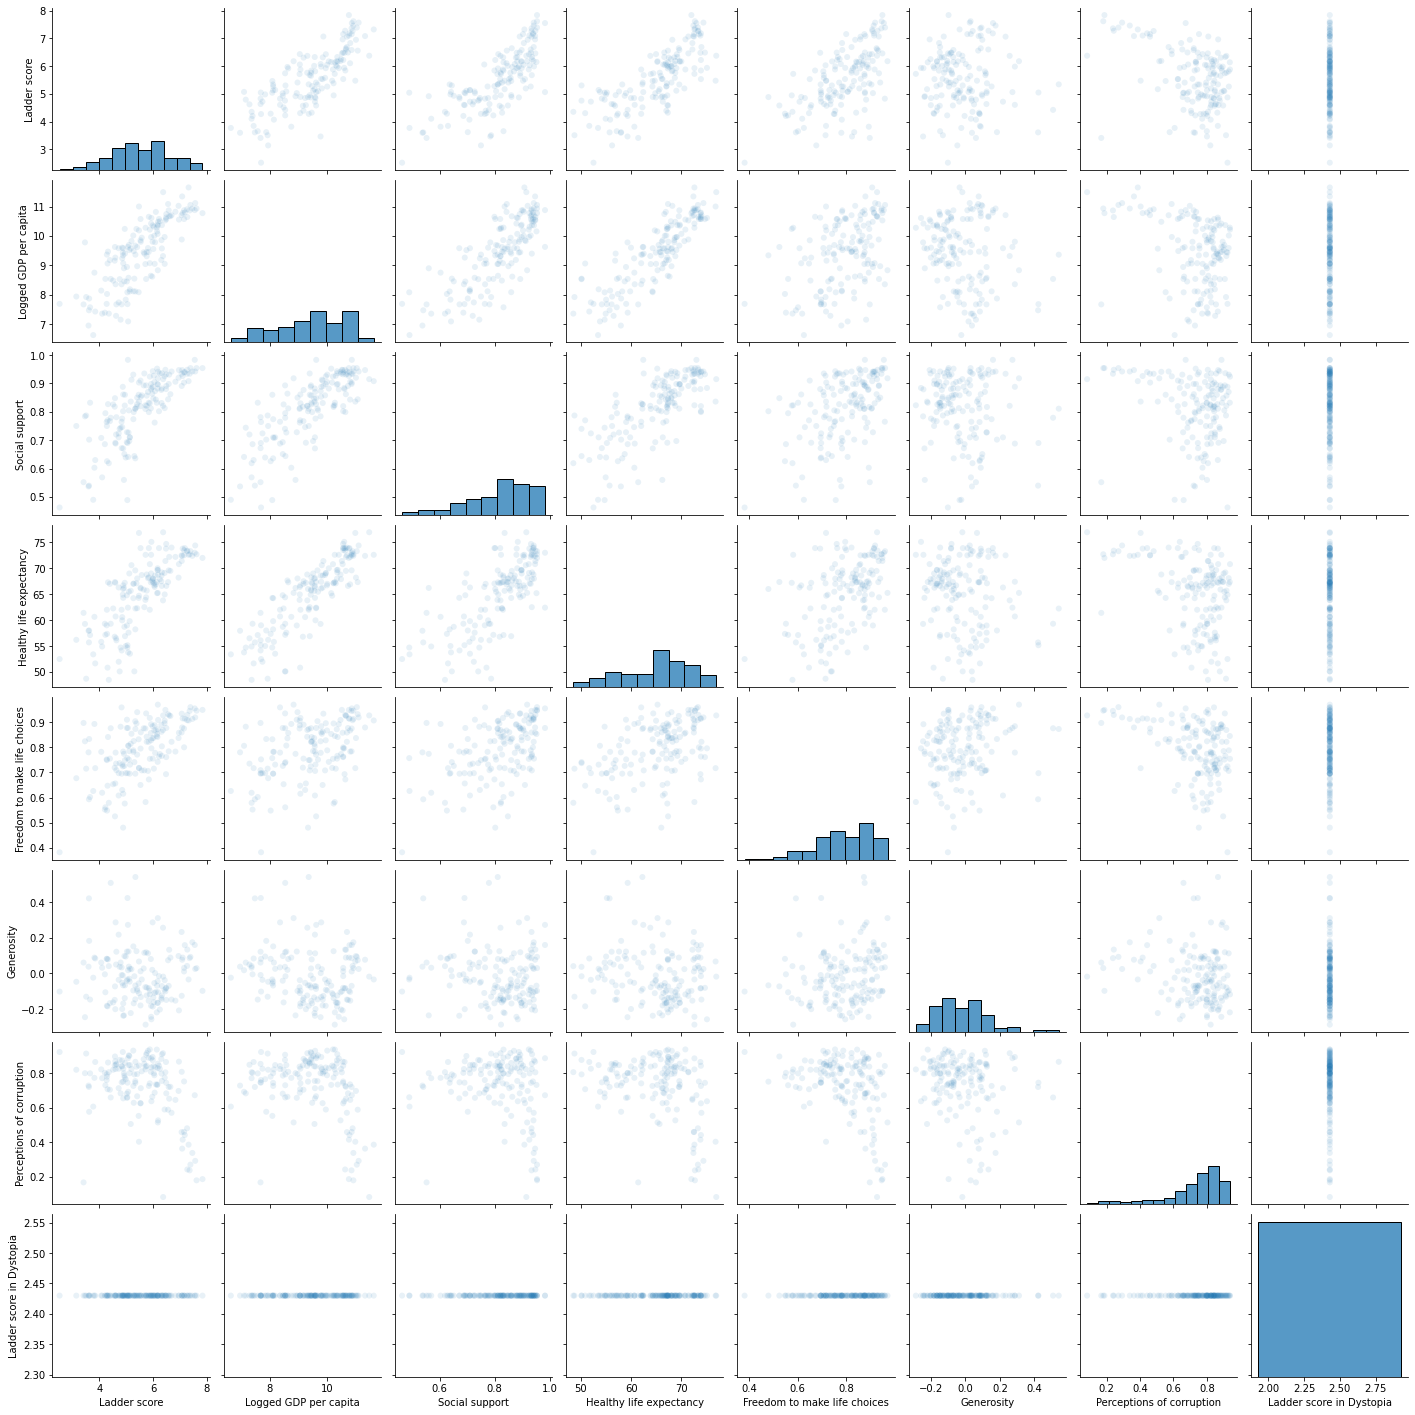

In [5]:
# ✔ Brief summary of data exploration
# 1. Data cleaning, Delete unused features to predict the Ladder score. 
# 2. Plot the relationship between Ladder score and other variables and find the higher-correlation features. 
# 3, Change the categorical variable to numeric variables
# 4. Polynomial features and Standardize the features.
# 5. Check the normality of the target value and normalize if it's skewed.

import seaborn as sns
import numpy as np

data_needs = ['Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 
        'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
        'Ladder score in Dystopia']
data = data[data_needs]
mask = data.dtypes == np.float
float_cols = data.columns[mask]
sns.pairplot(data[float_cols.tolist()], plot_kws=dict(alpha=.1, edgecolor='none'))

# According to pairplot, the Generosity seems not to have a strong correlation.

In [6]:
# 3, Change the categorical variable to numeric variables

from sklearn.preprocessing import OneHotEncoder

col = 'Regional indicator'
ohc = OneHotEncoder()
new_dat = ohc.fit_transform(data[[col]])
pd.DataFrame(new_dat).rename(columns={0:''})
data = data.drop(col, axis=1)
# new_dat = pd.DataFrame(new_dat).rename(columns={0:'Regional indicator'})
# new_dat

In [7]:
pd.DataFrame(new_dat.toarray())
col = 'Regional indicator'
cats = ohc.categories_
cats[0]

new_cols = ['_'.join([col, x]) for x in cats[0]]
new_ohc_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
new_ohc_df

,Regional indicator_Central and Eastern Europe,Regional indicator_Commonwealth of Independent States,Regional indicator_East Asia,Regional indicator_Latin America and Caribbean,Regional indicator_Middle East and North Africa,Regional indicator_North America and ANZ,Regional indicator_South Asia,Regional indicator_Southeast Asia,Regional indicator_Sub-Saharan Africa,Regional indicator_Western Europe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# 4. Standardize the features.

tar = 'Ladder score'
Y = data[[tar]]
X = data.drop(tar, axis=1)

In [75]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# pf = PolynomialFeatures()
s = StandardScaler()

# X_pf = pf.fit_transform(X)
X = pd.concat([X, new_ohc_df], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
cols_ss = ['Logged GDP per capita', 'Social support', 
        'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
        'Ladder score in Dystopia']
ohc_ss = new_cols
X_train_ss = s.fit_transform(X_train[cols_ss])
X_test_ss = s.transform(X_test[cols_ss])

X_train_ss = pd.DataFrame(X_train_ss, columns=X_train[cols_ss].columns)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test[cols_ss].columns)
train_new_ohc_df_ss = X_train[ohc_ss].reset_index(drop=True)
test_new_ohc_df_ss = X_test[ohc_ss].reset_index(drop=True)

X_train_ss = pd.concat([X_train_ss, train_new_ohc_df_ss], axis=1)
X_test_ss = pd.concat([X_test_ss, test_new_ohc_df_ss], axis=1)

# pd.DataFrame(X_train_ss, columns=X.columns)
# We don't use polinomial features because it makes diffcult to interpretation.

In [82]:
# X_train[ohc_ss].reset_index(drop=True)

In [83]:
# 5. Check the normality of the target value and normalize if it's skewed.
from scipy.stats.mstats import normaltest

normaltest(Y.values)
# Since pvalue is lager than 0.5, it's normalized. So, we don't need to normalize the target.

NormaltestResult(statistic=masked_array(data=[1.2847842582602853],
             mask=[False],
       fill_value=1e+20), pvalue=array([0.52603258]))

In [89]:
# ✔ Summary of training at least four linear regression models
# We will predict the target values with four models which are LinearRegression, LassoCV, RidgeCV, ElasticNetCV.
# In order to evalueate the best model, we will compare the results with rmse(root mean squared error).
# And finally get the r2_score of the best model.

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

lr = LinearRegression().fit(X_train_ss, Y_train)
# X_test_ss = s.transform(X_test)
lr_pred = lr.predict(X_test_ss)
lr_rmse = rmse(Y_test, lr_pred)
print('lr_rmse: ', lr_rmse)

alphas = np.linspace(0.005, 100, 20)
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train_ss, Y_train)
# X_test_ss = s.transform(X_test)
ridgeCV_pred = ridgeCV.predict(X_test_ss)
ridgeCV_rmse = rmse(Y_test, ridgeCV_pred)
print('ridgeCV.alpha_ : ', ridgeCV.alpha_, ' ridgeCV_rmse: ', ridgeCV_rmse)

alphas2 = np.linspace(1e-5, 1, 20)
lassoCV = LassoCV(alphas=alphas2, max_iter=200000, cv=4).fit(X_train_ss, Y_train.values.ravel())
# X_test_ss = s.transform(X_test)
lassoCV_pred = lassoCV.predict(X_test_ss)
lassoCV_rmse = rmse(Y_test, lassoCV_pred)
print('lassoCV.alpha_ : ', lassoCV.alpha_, ' lassoCV_rmse: ', lassoCV_rmse)

l1_ratios = np.linspace(0.1, 1, 10)
elasticNetCV = ElasticNetCV(alphas=alphas2, max_iter=500000, l1_ratio=l1_ratios).fit(X_train_ss, Y_train.values.ravel())
# X_test_ss = s.transform(X_test)
elasticNetCV_pred = elasticNetCV.predict(X_test_ss)
elasticNetCV_rmse = rmse(Y_test, elasticNetCV_pred)
print('elasticNetCV.alpha_ : ', elasticNetCV.alpha_, ' elasticNetCV_rmse: ', elasticNetCV_rmse)

rmse_vals = [lr_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

lr_rmse:  0.5042265845947704
ridgeCV.alpha_ :  21.056578947368422  ridgeCV_rmse:  0.501828479703691
lassoCV.alpha_ :  0.05264105263157895  lassoCV_rmse:  0.5881231718003225


c:\users\moon\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08466733163717777, tolerance: 0.009018736289285715
  model = cd_fast.enet_coordinate_descent(


elasticNetCV.alpha_ :  0.10527210526315789  elasticNetCV_rmse:  0.5700156450233613


,RMSE
Linear,0.504227
Ridge,0.501828
Lasso,0.588123
ElasticNet,0.570016


In [94]:
from sklearn.metrics import r2_score

print('lr.r2_score: ', r2_score(Y_test, lr_pred))
print('ridgeCV.r2_score: ', r2_score(Y_test, ridgeCV_pred))
print('lassoCV.r2_score: ', r2_score(Y_test, lassoCV_pred))
print('elasticNetCV.r2_score: ', r2_score(Y_test, elasticNetCV_pred))

lr.r2_score:  0.7587186709174947
ridgeCV.r2_score:  0.7610082843481112
lassoCV.r2_score:  0.671746912988977
elasticNetCV.r2_score:  0.6916486962164303


In [118]:
pd.DataFrame(zip(X.columns, ridgeCV.coef_[0])).sort_values(by=1)


,0,1
0,Logged GDP per capita,-0.090020
1,Social support,-0.028215
2,Healthy life expectancy,-0.028215
3,Freedom to make life choices,-0.028215
4,Generosity,-0.028215
...,...,...
162,Regional indicator_North America and ANZ,0.039951
163,Regional indicator_South Asia,0.105882
164,Regional indicator_Southeast Asia,0.210569
165,Regional indicator_Sub-Saharan Africa,0.234631
